In [ ]:
import numpy as np
import pandas as pd
import math
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.layers import Conv1D, Conv2D,LSTM,BatchNormalization,MaxPooling2D,Reshape, MaxPooling1D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.regularizers import l2
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(42)

# Loading Data

In [ ]:
X_test = np.load("/content/drive/MyDrive/Winter 2024/ECE C247/Project/project/X_test.npy")
y_test = np.load("/content/drive/MyDrive/Winter 2024/ECE C247/Project/project/y_test.npy")
person_train_valid = np.load("/content/drive/MyDrive/Winter 2024/ECE C247/Project/project/person_train_valid.npy")
X_train_valid = np.load("/content/drive/MyDrive/Winter 2024/ECE C247/Project/project/X_train_valid.npy")
y_train_valid = np.load("/content/drive/MyDrive/Winter 2024/ECE C247/Project/project/y_train_valid.npy")
person_test = np.load("/content/drive/MyDrive/Winter 2024/ECE C247/Project/project/person_test.npy")

In [ ]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


# Visualizing the Data

In [ ]:
X_test

array([[[  3.27148438,  10.05859375,   1.12304688, ...,   3.75976562,
          -0.43945312,   5.6640625 ],
        [  0.73242188,   4.8828125 ,   1.12304688, ...,  -0.1953125 ,
          -3.85742188,   1.51367188],
        [  3.95507812,   9.91210938,   1.22070312, ...,   1.31835938,
          -2.78320312,   3.41796875],
        ...,
        [  9.81445312,   9.52148438,   0.04882812, ...,   4.1015625 ,
          -3.17382812,   3.22265625],
        [  8.54492188,   9.61914062,   0.87890625, ...,   6.59179688,
          -0.92773438,   4.83398438],
        [ 12.59765625,  10.88867188,  -0.63476562, ...,   5.12695312,
          -4.05273438,   2.9296875 ]],

       [[-27.34375   , -28.66210938, -24.56054688, ...,  -5.41992188,
          -4.58984375, -11.27929688],
        [-21.19140625, -21.53320312, -19.38476562, ...,  -8.83789062,
          -6.88476562, -15.8203125 ],
        [-26.22070312, -30.078125  , -26.953125  , ...,  -7.71484375,
          -5.90820312, -12.45117188],
        ...,


In [ ]:
y_test

array([770, 769, 771, 772, 772, 771, 771, 772, 772, 769, 771, 772, 771,
       769, 770, 770, 772, 772, 771, 769, 771, 770, 769, 770, 772, 771,
       769, 770, 770, 772, 771, 771, 770, 770, 771, 769, 769, 769, 769,
       772, 770, 771, 769, 770, 772, 771, 769, 772, 771, 770, 770, 771,
       769, 772, 772, 770, 770, 772, 772, 771, 770, 770, 772, 770, 769,
       770, 770, 770, 771, 769, 769, 770, 772, 771, 771, 769, 770, 771,
       769, 771, 772, 771, 769, 770, 772, 769, 769, 772, 772, 769, 772,
       771, 770, 770, 769, 771, 769, 772, 770, 772, 770, 769, 769, 770,
       771, 769, 769, 772, 771, 771, 772, 770, 772, 770, 769, 769, 770,
       772, 770, 769, 769, 769, 772, 771, 772, 769, 772, 769, 771, 772,
       771, 770, 772, 770, 770, 772, 769, 770, 772, 769, 769, 771, 771,
       769, 771, 772, 772, 770, 769, 772, 769, 772, 770, 771, 770, 769,
       771, 769, 770, 772, 769, 770, 771, 771, 770, 771, 772, 770, 769,
       772, 770, 770, 770, 772, 771, 769, 770, 771, 770, 772, 77

In [ ]:
person_train_valid

array([[0.],
       [0.],
       [0.],
       ...,
       [8.],
       [8.],
       [8.]])

In [ ]:
X_train_valid

array([[[  5.6640625 ,   2.19726562,  -1.3671875 , ...,  -9.91210938,
          -8.3984375 ,  -8.25195312],
        [  9.47265625,   4.98046875,   2.1484375 , ...,  -7.2265625 ,
          -7.421875  ,  -3.95507812],
        [  7.51953125,   3.85742188,   1.31835938, ...,  -9.03320312,
          -7.91015625,  -7.6171875 ],
        ...,
        [ -4.05273438,  -8.203125  , -11.86523438, ...,  12.93945312,
          11.71875   ,  11.86523438],
        [ -6.15234375,  -9.52148438, -12.35351562, ...,  12.64648438,
          11.08398438,  10.49804688],
        [ -7.08007812, -10.59570312, -14.74609375, ...,  15.18554688,
          11.86523438,   9.71679688]],

       [[  9.08203125,  15.91796875,  17.82226562, ...,  -4.05273438,
          -2.97851562,  -1.171875  ],
        [ 10.15625   ,  13.33007812,  14.01367188, ...,  -3.46679688,
          -5.078125  ,  -4.44335938],
        [  8.44726562,  14.84375   ,  16.45507812, ...,  -4.93164062,
          -4.1015625 ,  -3.17382812],
        ...,


In [ ]:
y_train_valid

array([771, 772, 769, ..., 772, 772, 771], dtype=int32)

In [ ]:
person_test

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

# Building Train and Validation sets

In [ ]:
# Generating the training and validation indices using random splitting
ind_valid = np.random.choice(X_train_valid.shape[0], math.floor(0.2*X_train_valid.shape[0]), replace=False)
ind_train = np.array(list(set(range(X_train_valid.shape[0])).difference(set(ind_valid))))

# Creating the training and validation sets using the generated indices
(X_train, X_valid) = X_train_valid[ind_train], X_train_valid[ind_valid]
(y_train, y_valid) = y_train_valid[ind_train], y_train_valid[ind_valid]
(p_train, p_valid) = person_train_valid[ind_train], person_train_valid[ind_valid]

In [ ]:
print("Train Data Shape: ")
print("Input Shape:", X_train.shape)
print("Labels Shape:", y_train.shape)
print("Persons Shape:", p_train.shape)

print()

print("Validation Data Shape: ")
print("Input Shape:", X_valid.shape)
print("Labels Shape:", y_valid.shape)
print("Persons Shape:", p_valid.shape)

Train Data Shape: 
Input Shape: (1692, 22, 1000)
Labels Shape: (1692,)
Persons Shape: (1692, 1)

Validation Data Shape: 
Input Shape: (423, 22, 1000)
Labels Shape: (423,)
Persons Shape: (423, 1)


In [ ]:
# for naming consistency
p_test = person_test

Note:

Train Data: X_train, y_train, p_train

Test Data: X_test, y_test, p_test

Validation Data: X_valid, y_valid, p_valid

# Basic Data Processing

In [ ]:
def train_data_prep(X,y,p,sub_sample=2,average=2,noise=True):

    # Adjusting labels
    y -= 769

    total_X = None
    total_y = None
    total_p = None

    # Cropping the data (sample,22,1000) -> (sample,22,800)
    X = X[:,:,0:800]
    print('Shape of X after trimming:',X.shape)

    # Maxpooling the data in time dimension (sample,22,800) -> (sample,22,800/sub_sample)
    X_max = np.max(X.reshape(X.shape[0], X.shape[1], -1, sub_sample), axis=3)

    total_X = X_max
    total_y = y
    total_p = p
    print('Shape of X after maxpooling:',total_X.shape)

    # Averaging original data + adding noise
    X_average = np.mean(X.reshape(X.shape[0], X.shape[1], -1, average),axis=3)
    X_average = X_average + np.random.normal(0.0, 0.5, X_average.shape)

    # Augmenting averaged data with noise to max pool filtered data
    total_X = np.vstack((total_X, X_average))
    total_y = np.hstack((total_y, y))
    total_p = np.vstack((total_p, p))
    print('Shape of X after averaging+noise and concatenating:',total_X.shape)

    # Subsampling + optionally adding noise
    for i in range(sub_sample):

        X_subsample = X[:, :, i::sub_sample] + \
                            (np.random.normal(0.0, 0.5, X[:, :,i::sub_sample].shape) if noise else 0.0)
        # augmenting subsampled plus optionally noise added data
        total_X = np.vstack((total_X, X_subsample))
        total_y = np.hstack((total_y, y))
        total_p = np.vstack((total_p, p))

    print('Shape of X after subsampling and concatenating:',total_X.shape)
    print('Shape of Y:',total_y.shape)
    print('Shape of P:',total_p.shape)

    return total_X, total_y, total_p


def test_data_prep(X, y, p, sub_sample=2):

    #Adjusting labels
    total_y = y - 769
    total_p = p
    total_X = None

    # Trimming the data (sample,22,1000) -> (sample,22,800)
    X = X[:,:,0:800]
    print('Shape of X after trimming:',X.shape)

    # Maxpooling the data (sample,22,800) -> (sample,22,800/sub_sample)
    X_max = np.max(X.reshape(X.shape[0], X.shape[1], -1, sub_sample), axis=3)
    total_X = X_max
    print('Shape of X after maxpooling:',total_X.shape)

    return total_X, total_y, total_p

In [ ]:
print('Train prep:')
X_train, y_train, p_train = train_data_prep(X_train, y_train, p_train)
print()
print('Validation prep:')
X_valid, y_valid, p_valid = train_data_prep(X_valid, y_valid, p_valid)
print()
print('Test prep:')
X_test, y_test, p_test = test_data_prep(X_test, y_test, p_test)

Train prep:
Shape of X after trimming: (1692, 22, 800)
Shape of X after maxpooling: (1692, 22, 400)
Shape of X after averaging+noise and concatenating: (3384, 22, 400)
Shape of X after subsampling and concatenating: (6768, 22, 400)
Shape of Y: (6768,)
Shape of P: (6768, 1)

Validation prep:
Shape of X after trimming: (423, 22, 800)
Shape of X after maxpooling: (423, 22, 400)
Shape of X after averaging+noise and concatenating: (846, 22, 400)
Shape of X after subsampling and concatenating: (1692, 22, 400)
Shape of Y: (1692,)
Shape of P: (1692, 1)

Test prep:
Shape of X after trimming: (443, 22, 800)
Shape of X after maxpooling: (443, 22, 400)


Confirming validation is still 20% of total train and validation points after preprocessing.

In [ ]:
1692/(1692+6768)

0.2

In [ ]:
# Confirming labels look good - should be between 0 and 3
print(y_train[0])
print(y_valid[0])
print(y_test[0])

2
0
1


In [ ]:
print('Shape of all data after preprocessing')
print()

print("Train Data Shape: ")
print("Input Shape:", X_train.shape)
print("Labels Shape:", y_train.shape)
print("Persons Shape:", p_train.shape)
print()

print("Validation Data Shape: ")
print("Input Shape:", X_valid.shape)
print("Labels Shape:", y_valid.shape)
print("Persons Shape:", p_valid.shape)
print()

print("Test Data Shape: ")
print("Input Shape:", X_test.shape)
print("Labels Shape:", y_test.shape)
print("Persons Shape:", p_test.shape)
print()

Shape of all data after preprocessing

Train Data Shape: 
Input Shape: (6768, 22, 400)
Labels Shape: (6768,)
Persons Shape: (6768, 1)

Validation Data Shape: 
Input Shape: (1692, 22, 400)
Labels Shape: (1692,)
Persons Shape: (1692, 1)

Test Data Shape: 
Input Shape: (443, 22, 400)
Labels Shape: (443,)
Persons Shape: (443, 1)



# Formatting Data Correctly for CNN+LSTM model

In [ ]:
# Converting the labels to categorical variables for multiclass classification
y_train = to_categorical(y_train, 4)
y_valid = to_categorical(y_valid, 4)
y_test = to_categorical(y_test, 4)
print('Shape of training labels after categorical conversion:',y_train.shape)
print('Shape of validation labels after categorical conversion:',y_valid.shape)
print('Shape of test labels after categorical conversion:',y_test.shape)

Shape of training labels after categorical conversion: (6768, 4)
Shape of validation labels after categorical conversion: (1692, 4)
Shape of test labels after categorical conversion: (443, 4)


In [ ]:
# Ensuring all labels look good - should look like one hot encoding
print(y_train[0])
print(y_valid[0])
print(y_test[0])

[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]


In [ ]:
# Adding width of the segment to be 1 for all inputs
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print('Shape of training set after adding width info:', X_train.shape)
print('Shape of validation set after adding width info:', X_valid.shape)
print('Shape of test set after adding width info:', X_test.shape)

Shape of training set after adding width info: (6768, 22, 400, 1)
Shape of validation set after adding width info: (1692, 22, 400, 1)
Shape of test set after adding width info: (443, 22, 400, 1)


In [ ]:
# Reshaping the training, validation, and test datasets
X_train = np.swapaxes(X_train, 1,3)
X_train = np.swapaxes(X_train, 1,2)
X_valid = np.swapaxes(X_valid, 1,3)
X_valid = np.swapaxes(X_valid, 1,2)
X_test = np.swapaxes(X_test, 1,3)
X_test = np.swapaxes(X_test, 1,2)
print('Shape of training set after dimension reshaping:', X_train.shape)
print('Shape of validation set after dimension reshaping:', X_valid.shape)
print('Shape of test set after dimension reshaping:', X_test.shape)

Shape of training set after dimension reshaping: (6768, 400, 1, 22)
Shape of validation set after dimension reshaping: (1692, 400, 1, 22)
Shape of test set after dimension reshaping: (443, 400, 1, 22)


In [ ]:
print('Shape of all data after formatting')
print()

print("Train Data Shape: ")
print("Input Shape:", X_train.shape)
print("Labels Shape:", y_train.shape)
print("Persons Shape:", p_train.shape)
print()

print("Validation Data Shape: ")
print("Input Shape:", X_valid.shape)
print("Labels Shape:", y_valid.shape)
print("Persons Shape:", p_valid.shape)
print()

print("Test Data Shape: ")
print("Input Shape:", X_test.shape)
print("Labels Shape:", y_test.shape)
print("Persons Shape:", p_test.shape)
print()

Shape of all data after formatting

Train Data Shape: 
Input Shape: (6768, 400, 1, 22)
Labels Shape: (6768, 4)
Persons Shape: (6768, 1)

Validation Data Shape: 
Input Shape: (1692, 400, 1, 22)
Labels Shape: (1692, 4)
Persons Shape: (1692, 1)

Test Data Shape: 
Input Shape: (443, 400, 1, 22)
Labels Shape: (443, 4)
Persons Shape: (443, 1)



# Generating Subject 1 Data

In [ ]:
# Getting Training, Testing, Validation indices for subject 1
subject_indices_test = np.where(p_test[:, 0] == 0)[0]
subject_indices_train = np.where(p_train[:, 0] == 0)[0]
subject_indices_valid = np.where(p_valid[:, 0] == 0)[0]

print('Subject 1 train num:', len(subject_indices_train))
print('Subject 1 valid num:', len(subject_indices_valid))
print('Subject 1 test num:', len(subject_indices_test))

Subject 1 train num: 768
Subject 1 valid num: 180
Subject 1 test num: 50


In [ ]:
180/(180+768)

0.189873417721519

In [ ]:
# Getting train, test, and validation data for subject 1
x_subject1_train_data = X_train[subject_indices_train]
y_subject1_train_data = y_train[subject_indices_train]

x_subject1_valid_data = X_valid[subject_indices_valid]
y_subject1_valid_data = y_valid[subject_indices_valid]

x_subject1_test_data = X_test[subject_indices_test]
y_subject1_test_data = y_test[subject_indices_test]

print('Training Data for subject 1 dimensions')
print(x_subject1_train_data.shape)
print(y_subject1_train_data.shape)

print('Validation Data for subject 1 dimensions')
print(x_subject1_valid_data.shape)
print(y_subject1_valid_data.shape)

print('Testing Data for subject 1 dimensions')
print(x_subject1_test_data.shape)
print(y_subject1_test_data.shape)

Training Data for subject 1 dimensions
(768, 400, 1, 22)
(768, 4)
Validation Data for subject 1 dimensions
(180, 400, 1, 22)
(180, 4)
Testing Data for subject 1 dimensions
(50, 400, 1, 22)
(50, 4)


# Building CNN-LSTM model

In [ ]:
# Define the CNN-LSTM model
cnn_lstm_model = Sequential()

# Convolutional layer Block 1
cnn_lstm_model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='elu', kernel_regularizer=l2(0.001), input_shape=(400,1,22)))
cnn_lstm_model.add(BatchNormalization())
cnn_lstm_model.add(MaxPooling2D(pool_size=(2,1), padding='same'))
cnn_lstm_model.add(Dropout(0.25))

# Convolutional layer Block 2
cnn_lstm_model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='elu', kernel_regularizer=l2(0.001)))
cnn_lstm_model.add(BatchNormalization())
cnn_lstm_model.add(MaxPooling2D(pool_size=(2,1), padding='same'))
cnn_lstm_model.add(Dropout(0.25))

# Convolutional layer Block 3
cnn_lstm_model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='elu', kernel_regularizer=l2(0.001)))
cnn_lstm_model.add(BatchNormalization())
cnn_lstm_model.add(MaxPooling2D(pool_size=(2,1), padding='same'))
cnn_lstm_model.add(Dropout(0.25))

# Flatten output for LSTM layer
cnn_lstm_model.add(Flatten())
cnn_lstm_model.add(Dense(128, activation='elu', kernel_regularizer=l2(0.005)))
cnn_lstm_model.add(BatchNormalization())
cnn_lstm_model.add(Dropout(0.5))
cnn_lstm_model.add(Reshape((16, 8)))

# LSTM layers
cnn_lstm_model.add(LSTM(64, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))

# Output layer with Softmax activation
cnn_lstm_model.add(Flatten())
cnn_lstm_model.add(Dense(4, activation='softmax'))

# Print the model summary
cnn_lstm_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 400, 1, 16)        3184      
                                                                 
 batch_normalization (Batch  (None, 400, 1, 16)        64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 200, 1, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 200, 1, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 1, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 200, 1, 32)        1

In [ ]:
# Model Parameters
learning_rate = 1e-3
epochs = 50
cnn_lstm_optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

In [ ]:
# Compiling the model
cnn_lstm_model.compile(loss='categorical_crossentropy',
                 optimizer=cnn_lstm_optimizer,
                 metrics=['accuracy'])

### Training on subject 1 and testing on subject 1

In [ ]:
# Training the model on subject 1 data
cnn_lstm_model_results = cnn_lstm_model.fit(x_subject1_train_data,
             y_subject1_train_data,
             batch_size=64,
             epochs=50,
             validation_data=(x_subject1_valid_data, y_subject1_valid_data), verbose=True)

Epoch 1/50
12/12 [==============================] - 8s 329ms/step - loss: 2.5821 - accuracy: 0.3138 - val_loss: 2.6016 - val_accuracy: 0.2667
Epoch 2/50
12/12 [==============================] - 2s 146ms/step - loss: 2.2272 - accuracy: 0.5352 - val_loss: 3.3164 - val_accuracy: 0.2667
Epoch 3/50
12/12 [==============================] - 2s 130ms/step - loss: 1.8111 - accuracy: 0.6641 - val_loss: 3.9952 - val_accuracy: 0.2667
Epoch 4/50
12/12 [==============================] - 2s 132ms/step - loss: 1.4515 - accuracy: 0.7773 - val_loss: 3.0365 - val_accuracy: 0.2889
Epoch 5/50
12/12 [==============================] - 2s 127ms/step - loss: 1.1653 - accuracy: 0.8698 - val_loss: 2.5238 - val_accuracy: 0.4333
Epoch 6/50
12/12 [==============================] - 2s 127ms/step - loss: 0.9841 - accuracy: 0.9206 - val_loss: 2.2809 - val_accuracy: 0.4833
Epoch 7/50
12/12 [==============================] - 1s 125ms/step - loss: 0.8793 - accuracy: 0.9492 - val_loss: 2.1034 - val_accuracy: 0.5556
Epoch 

Training of baseline CNN model on subject 1 data


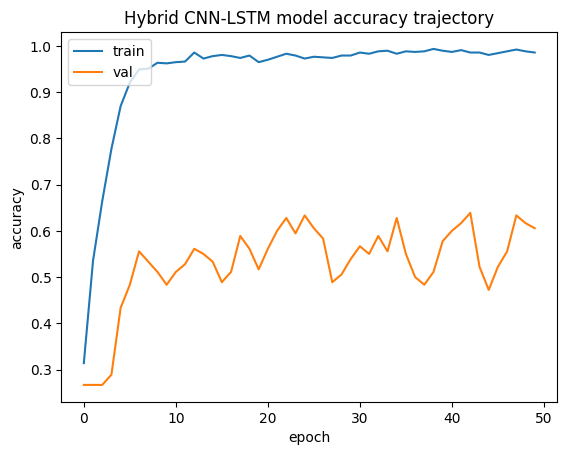

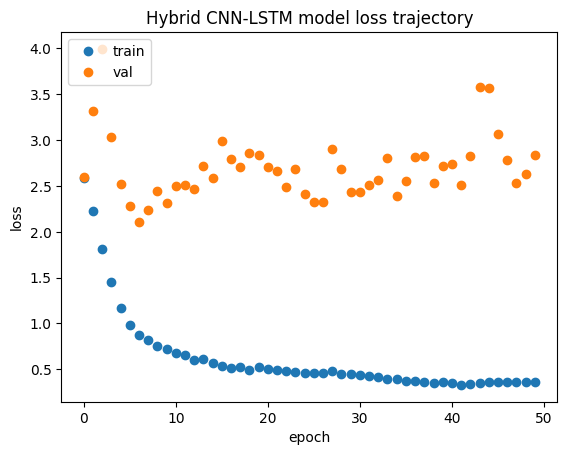

In [ ]:
# Plotting accuracy trajectory
print("Training of baseline CNN model on subject 1 data")
plt.plot(cnn_lstm_model_results.history['accuracy'])
plt.plot(cnn_lstm_model_results.history['val_accuracy'])
plt.title('Hybrid CNN-LSTM model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting loss trajectory
plt.plot(cnn_lstm_model_results.history['loss'],'o')
plt.plot(cnn_lstm_model_results.history['val_loss'],'o')
plt.title('Hybrid CNN-LSTM model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
## Testing the CNN-LSTM model on Subject 1

cnn_lstm_score = cnn_lstm_model.evaluate(x_subject1_test_data, y_subject1_test_data, verbose=0)
print('Test accuracy of CNN-LSTM model for Subject 1:',cnn_lstm_score[1])

Test accuracy of CNN-LSTM model for Subject 1: 0.6800000071525574


### Training on all subjects and testing on subject 1.

In [ ]:
# Training the model on all subjects
cnn_lstm_model_results_all_vs_1 = cnn_lstm_model.fit(X_train,
             y_train,
             epochs=50, batch_size = 64,
             validation_data=(X_valid, y_valid), verbose=True)

Epoch 1/50
106/106 [==============================] - 23s 160ms/step - loss: 1.5417 - accuracy: 0.4078 - val_loss: 1.4600 - val_accuracy: 0.4580
Epoch 2/50
106/106 [==============================] - 14s 133ms/step - loss: 1.2550 - accuracy: 0.5937 - val_loss: 1.3075 - val_accuracy: 0.5443
Epoch 3/50
106/106 [==============================] - 15s 139ms/step - loss: 1.1061 - accuracy: 0.6798 - val_loss: 1.3613 - val_accuracy: 0.5745
Epoch 4/50
106/106 [==============================] - 14s 137ms/step - loss: 1.0173 - accuracy: 0.7129 - val_loss: 1.2728 - val_accuracy: 0.6076
Epoch 5/50
106/106 [==============================] - 15s 137ms/step - loss: 0.9291 - accuracy: 0.7564 - val_loss: 1.3501 - val_accuracy: 0.6164
Epoch 6/50
106/106 [==============================] - 15s 137ms/step - loss: 0.8787 - accuracy: 0.7853 - val_loss: 1.3726 - val_accuracy: 0.6005
Epoch 7/50
106/106 [==============================] - 15s 142ms/step - loss: 0.8212 - accuracy: 0.8092 - val_loss: 1.4309 - val_ac

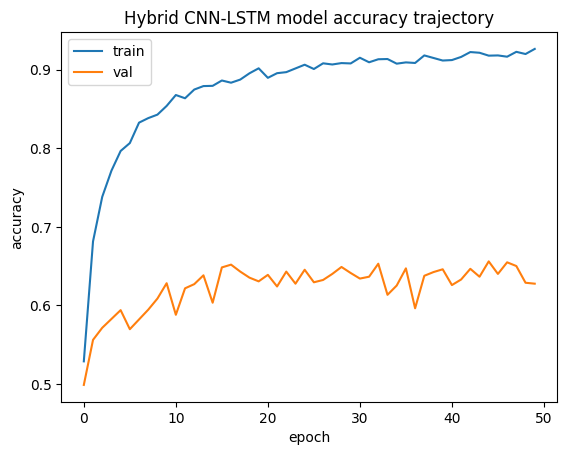

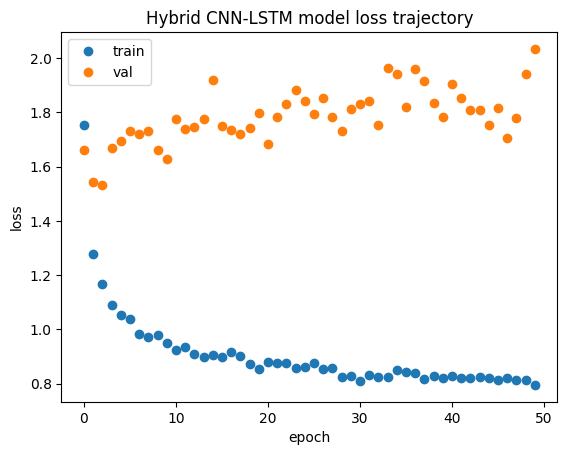

In [ ]:
# Plotting accuracy trajectory
plt.plot(cnn_lstm_model_results_all_vs_1.history['accuracy'])
plt.plot(cnn_lstm_model_results_all_vs_1.history['val_accuracy'])
plt.title('Hybrid CNN-LSTM model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting loss trajectory
plt.plot(cnn_lstm_model_results_all_vs_1.history['loss'],'o')
plt.plot(cnn_lstm_model_results_all_vs_1.history['val_loss'],'o')
plt.title('Hybrid CNN-LSTM model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
## Testing the CNN-LSTM model on Subject 1

cnn_lstm_score = cnn_lstm_model.evaluate(x_subject1_test_data, y_subject1_test_data, verbose=0)
print('Test accuracy of CNN-LSTM model for Subject 1:',cnn_lstm_score[1])

Test accuracy of CNN-LSTM model for Subject 1: 0.699999988079071


### Train on all subjects and test on all subjects

In [ ]:
# Training the model on all subjects
cnn_lstm_model_results_all_vs_all = cnn_lstm_model.fit(X_train,y_train,
             epochs=50, batch_size = 64, validation_data=(X_valid, y_valid), verbose=True)

Epoch 1/50
106/106 [==============================] - 17s 161ms/step - loss: 0.7901 - accuracy: 0.9246 - val_loss: 1.8355 - val_accuracy: 0.6371
Epoch 2/50
106/106 [==============================] - 16s 148ms/step - loss: 0.7981 - accuracy: 0.9241 - val_loss: 1.7621 - val_accuracy: 0.6359
Epoch 3/50
106/106 [==============================] - 16s 147ms/step - loss: 0.8280 - accuracy: 0.9152 - val_loss: 1.8458 - val_accuracy: 0.6454
Epoch 4/50
106/106 [==============================] - 15s 143ms/step - loss: 0.8143 - accuracy: 0.9208 - val_loss: 1.7950 - val_accuracy: 0.6294
Epoch 5/50
106/106 [==============================] - 15s 146ms/step - loss: 0.8064 - accuracy: 0.9224 - val_loss: 1.8096 - val_accuracy: 0.6690
Epoch 6/50
106/106 [==============================] - 15s 144ms/step - loss: 0.7927 - accuracy: 0.9257 - val_loss: 1.9227 - val_accuracy: 0.6265
Epoch 7/50
106/106 [==============================] - 16s 149ms/step - loss: 0.8009 - accuracy: 0.9214 - val_loss: 1.8115 - val_ac

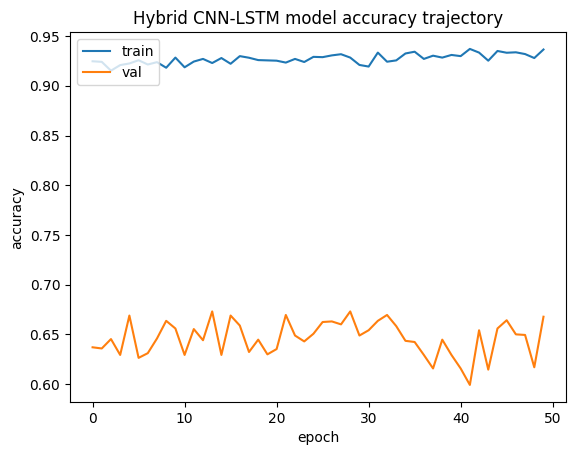

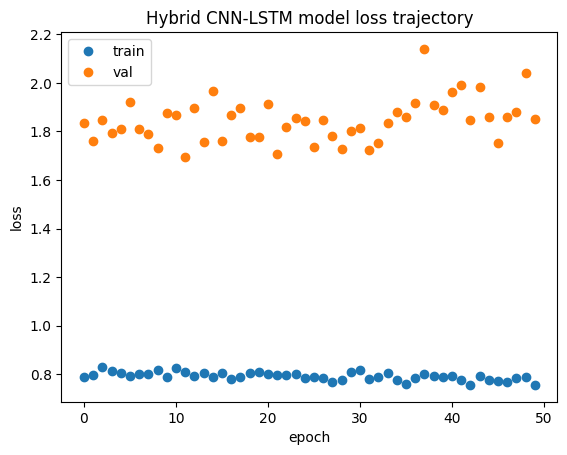

In [ ]:
# Plotting accuracy trajectory
plt.plot(cnn_lstm_model_results_all_vs_all.history['accuracy'])
plt.plot(cnn_lstm_model_results_all_vs_all.history['val_accuracy'])
plt.title('Hybrid CNN-LSTM model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting loss trajectory
plt.plot(cnn_lstm_model_results_all_vs_all.history['loss'],'o')
plt.plot(cnn_lstm_model_results_all_vs_all.history['val_loss'],'o')
plt.title('Hybrid CNN-LSTM model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
## Testing the CNN-LSTM model on all subjects

cnn_lstm_score = cnn_lstm_model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy of CNN-LSTM model for all subjects:',cnn_lstm_score[1])

Test accuracy of CNN-LSTM model for all subjects: 0.6772009134292603


## Evaluating classification accuracy as a function of time

Evaluating increasing time frames of processed data:


*   0-100
*   0-200
*   0-300
*   0-400

All the data is used in this evaluation (not particular to any subject). Also the optimized CNN model is used. A model is evaluated on each time frame for exactly 50 epochs.

In [ ]:
def generateCNN_LSTM_Model(input_shape=(400,1,22)):
  # Define the CNN-LSTM model
  cnn_lstm_model = Sequential()

  # Convolutional layer Block 1
  cnn_lstm_model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='elu', kernel_regularizer=l2(0.001), input_shape=input_shape))
  cnn_lstm_model.add(BatchNormalization())
  cnn_lstm_model.add(MaxPooling2D(pool_size=(2,1), padding='same'))
  cnn_lstm_model.add(Dropout(0.25))

  # Convolutional layer Block 2
  cnn_lstm_model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='elu', kernel_regularizer=l2(0.001)))
  cnn_lstm_model.add(BatchNormalization())
  cnn_lstm_model.add(MaxPooling2D(pool_size=(2,1), padding='same'))
  cnn_lstm_model.add(Dropout(0.25))

  # Convolutional layer Block 3
  cnn_lstm_model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='elu', kernel_regularizer=l2(0.001)))
  cnn_lstm_model.add(BatchNormalization())
  cnn_lstm_model.add(MaxPooling2D(pool_size=(2,1), padding='same'))
  cnn_lstm_model.add(Dropout(0.25))

  # Flatten output for LSTM layer
  cnn_lstm_model.add(Flatten())
  cnn_lstm_model.add(Dense(128, activation='elu', kernel_regularizer=l2(0.005)))
  cnn_lstm_model.add(BatchNormalization())
  cnn_lstm_model.add(Dropout(0.5))
  cnn_lstm_model.add(Reshape((16, 8)))

  # LSTM layers
  cnn_lstm_model.add(LSTM(64, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))

  # Output layer with Softmax activation
  cnn_lstm_model.add(Flatten())
  cnn_lstm_model.add(Dense(4, activation='softmax'))

  return cnn_lstm_model

In [ ]:
# Helper function to generate crops of data in time series
def generateCroppedDataSet(train_x, valid_x, test_x, begin, end):
  c_tr_x = train_x[:, begin:end, :, :]
  c_v_x = valid_x[:, begin:end, :, :]
  c_te_x = test_x[:, begin:end, :, :]
  return c_tr_x, c_v_x, c_te_x

In [ ]:
def generateTensors(train, valid, test):
  # construct the dataset from the NumPy arrays
  train = tf.data.Dataset.from_tensor_slices((train, y_train))
  valid = tf.data.Dataset.from_tensor_slices((valid, y_valid))
  test = tf.data.Dataset.from_tensor_slices((test, y_test))

  # batch and shuffle
  train = train.shuffle(8000).batch(64)
  valid = valid.shuffle(8000).batch(64)
  test = test.shuffle(8000).batch(64)

  return train, valid, test

In [ ]:
def plotAccuracyLossHistory(model_results, intro):
  print(intro)
  print()
  # Plotting accuracy trajectory
  plt.plot(model_results.history['accuracy'])
  plt.plot(model_results.history['val_accuracy'])
  plt.title('CNN Accuracy trajectory')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='lower right')
  plt.show()

  # Plotting loss trajectory
  plt.plot(model_results.history['loss'],'o')
  plt.plot(model_results.history['val_loss'],'o')
  plt.title('CNN Loss trajectory')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper right')
  plt.show()

Analyzing the frame (0, 100)
(6768, 100, 1, 22) (1692, 100, 1, 22) (443, 100, 1, 22)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 1, 16)        3184      
                                                                 
 batch_normalization_4 (Bat  (None, 100, 1, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 50, 1, 16)         0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 50, 1, 16)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 1, 32)         4640      
                                   

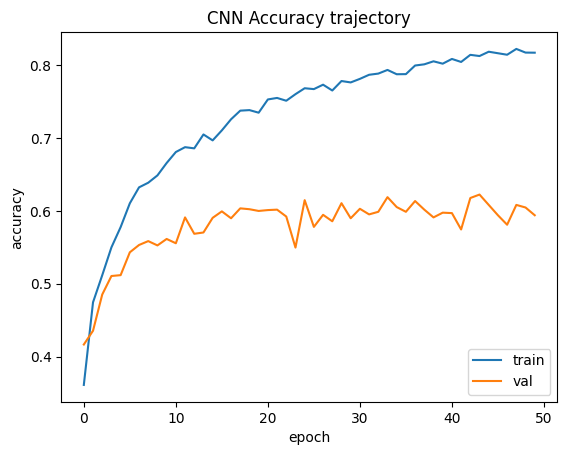

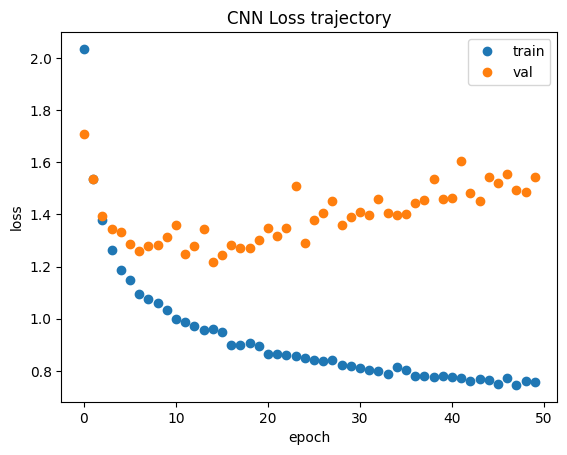

Test accuracy of model: 0.6388261914253235


Analyzing the frame (0, 200)
(6768, 200, 1, 22) (1692, 200, 1, 22) (443, 200, 1, 22)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 200, 1, 16)        3184      
                                                                 
 batch_normalization_8 (Bat  (None, 200, 1, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 100, 1, 16)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 100, 1, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 1, 32)        4

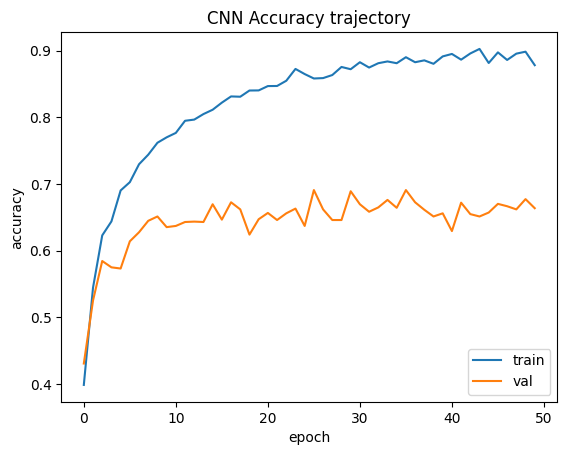

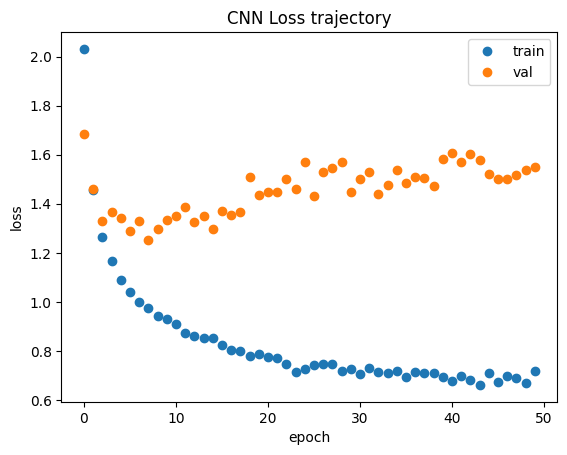

Test accuracy of model: 0.7065462470054626


Analyzing the frame (0, 300)
(6768, 300, 1, 22) (1692, 300, 1, 22) (443, 300, 1, 22)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 300, 1, 16)        3184      
                                                                 
 batch_normalization_12 (Ba  (None, 300, 1, 16)        64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 150, 1, 16)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 150, 1, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 150, 1, 32)        4

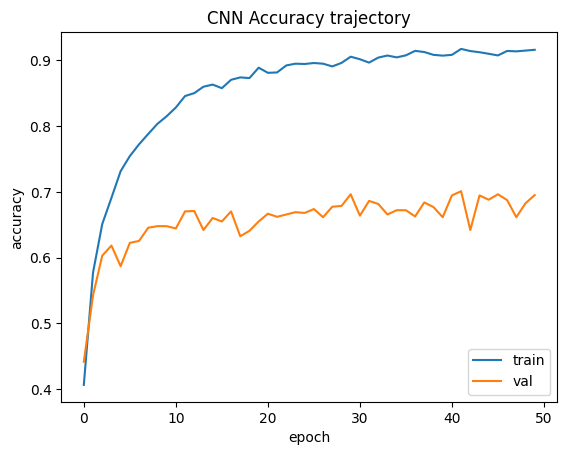

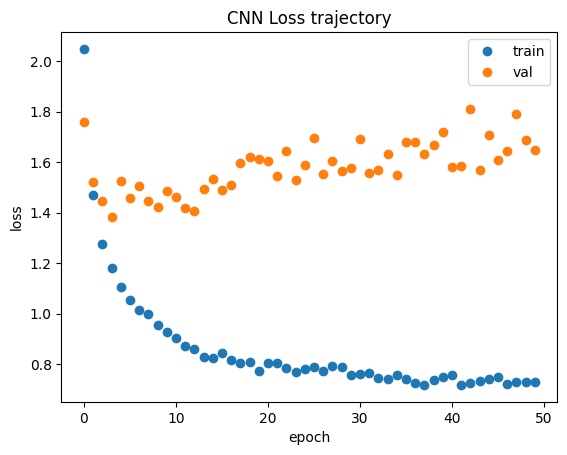

Test accuracy of model: 0.6952595710754395


Analyzing the frame (0, 400)
(6768, 400, 1, 22) (1692, 400, 1, 22) (443, 400, 1, 22)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 400, 1, 16)        3184      
                                                                 
 batch_normalization_16 (Ba  (None, 400, 1, 16)        64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 200, 1, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 200, 1, 16)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 200, 1, 32)        4

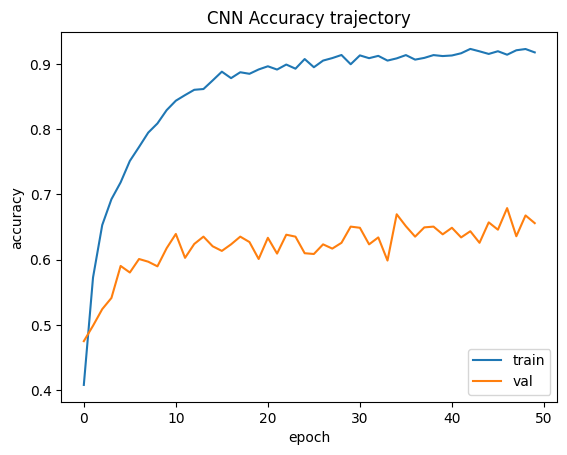

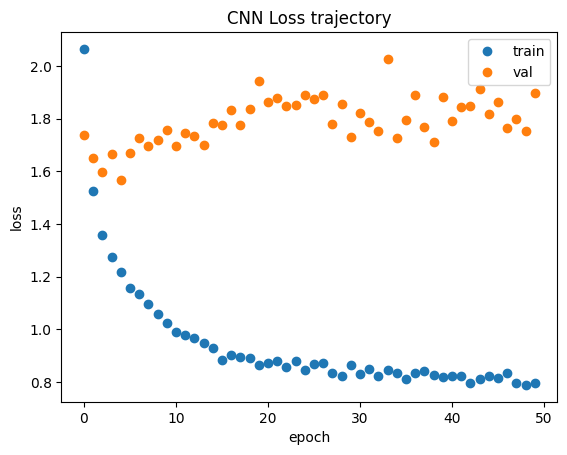

Test accuracy of model: 0.6343114972114563




In [ ]:
test_acc = []
for end in [100, 200, 300, 400]:
  time_frame = (0, end)
  print('Analyzing the frame', time_frame)
  c_tr_x, c_v_x, c_te_x = generateCroppedDataSet(X_train, X_valid, X_test, 0, end)
  print(c_tr_x.shape, c_v_x.shape, c_te_x.shape)
  train, valid, test = generateTensors(c_tr_x, c_v_x, c_te_x)
  # We have data now, so we need to train a model
  c_l_model = generateCNN_LSTM_Model(input_shape=(end, 1, 22))
  c_l_model.summary()
  c_l_model.compile(loss='categorical_crossentropy',
                 optimizer=keras.optimizers.Adam(learning_rate=1e-3),
                 metrics=['accuracy'])
  c_l_model_results = c_l_model.fit(x=train, validation_data=valid, epochs=50, batch_size= 64, verbose=True)
  plotAccuracyLossHistory(c_l_model_results, 'Model Training')
  score = c_l_model.evaluate(x=test, verbose=0)
  print('Test accuracy of model:', score[1])
  test_acc.append(score[1])
  print()
  print()

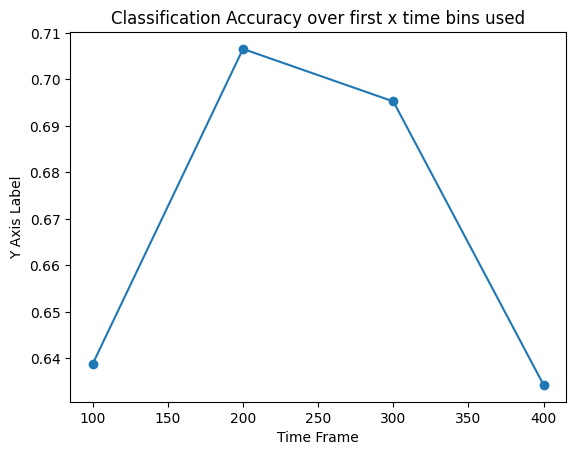

In [ ]:
x_values = [100, 200, 300, 400]
plt.plot(x_values, test_acc, marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Time Frame')
plt.ylabel('Y Axis Label')
plt.title('Classification Accuracy over first x time bins used')

# Show plot
plt.show()